## 과제4

1. #로 표시된 줄에 아랫줄 코드의 주석 쓰기 (단순한 변수, 함수 이름의 나열이 아닌 구체적인 설명을 쓸 것)
2. #TODO: 설명 이 써있는 줄을 알맞은 코드로 대체
3. 각 셀을 실행하여 결과 출력
4. 본 파일 이름을 ```Homework4_학번_이름``` 으로 변경하여 kyurijo@chungbuk.ac.kr로 제출 (이메일 제목:```[과제4]학번_이름```)
5. 제출기한 : 11월 17일 일요일 23:59:59

## Task 1

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import NaN
# billboard.csv 를 읽어옵니다.
billboard = pd.read_csv('billboard.csv')
#  넓은 데이터 : 열 이름이 변수 이름이 아닌 값을 표현하고 있음
# 데이터 녹이기를 통해 깔금한 데이터로 변경
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

#TODO : billboard_long의 행, 열 개수 출력
#TODO : billboard_long의 데이터 출력

print( billboard_long.shape)
print(billboard_long)

(24092, 7)
       year                artist                    track  time date.entered  \
0      2000                 2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000               2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000          3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000          3 Doors Down                    Loser  4:24   2000-10-21   
4      2000              504 Boyz            Wobble Wobble  3:35   2000-04-15   
5      2000                  98^0  Give Me Just One Nig...  3:24   2000-08-19   
6      2000               A*Teens            Dancing Queen  3:44   2000-07-08   
7      2000               Aaliyah            I Don't Wanna  4:15   2000-01-29   
8      2000               Aaliyah                Try Again  4:03   2000-03-18   
9      2000        Adams, Yolanda            Open My Heart  5:30   2000-08-26   
10     2000         Adkins, Trace                     More  3:05   2000-04-29   
11     2000   Agu

In [10]:
#track 의 값이 Loser 인 행들을 가져옵니다. 
b_loser = billboard_long[billboard_long.track == 'Loser']
print(b_loser.head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [11]:
#year artist tack time 의 값들을 열로 갖는 행들을 가져옵니다.
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']] 
print(billboard_songs.shape)

(24092, 4)


In [12]:
#billborad_songs 의 요소들 중 중복된 요소를 제거하나 하나만 남깁니다.
billboard_songs = billboard_songs.drop_duplicates() 
print(billboard_songs.shape)

(317, 4)


In [13]:
# id 란을 추가하고 billboard_songs 의 길이를 넣어줍니다.
billboard_songs['id'] = range(len(billboard_songs)) 
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [14]:
# merge 메서드는 내부 조인을 통해 왼쪽, 오른쪽 데이터프레임에서 지정한 열이 일치할 때 연결됩니다. 
# billborad_songs 와 billboard-_long 의 year artist track time 이 일치하므로 합쳐집니다.
billboard_ratings = billboard_long.merge(billboard_songs, on=['year', 'artist', 'track', 'time']) 
print(billboard_ratings.shape)
print(billboard_ratings.head())

(24092, 8)
   year artist                    track  time date.entered week  rating  id
0  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0   0
1  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk2    82.0   0
2  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk3    72.0   0
3  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk4    77.0   0
4  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk5    87.0   0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


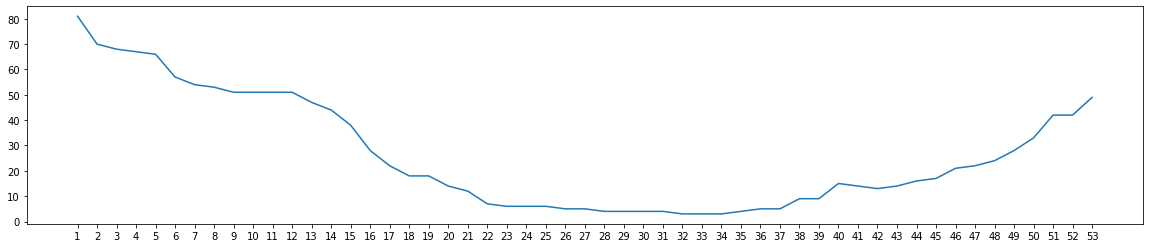

In [15]:
fig = plt.figure(figsize=(20,4))
axis = fig.add_subplot(111)

#TODO : billboard_long에서 1) track 이름이 Kryptonite 이고, 2) rating이 NaN이 아닌 행의 3)'week', 'rating' 열을 가져와서 subset 변수에 저장
#힌트 : pd.notnull(dataframe변수) 를 사용하면 NaN이 아닌 행이 True인 시리즈를 얻을 수 있음
t = billboard_long[billboard_long.track == 'Kryptonite']
w = t[pd.notnull(billboard_long.rating) == True]
subset = w[['week','rating']]

#print(subset)

#TODO : subset의 week 열을 문자열 'wk'을 기준으로 분리한 뒤, 두번째 요소들(몇 주인지를 나타내는 숫자)을 새로운 열 'week_num'으로 저장
#힌트 : str.split()과 str.get() 사용

subset['week_num'] = subset['week'].str.split('wk').str.get(1)
axis.plot(subset['week_num'], subset['rating'])

## Task 2

In [1]:
import os 
import urllib.request

# 파일 다운로드에 시간이 오래 걸릴 수 있으니 5개 파일이 다 받아질 때까지 기다릴 것
with open('raw_data_urls.txt', 'r') as data_urls:
   # enumerate 함수를 사용하여 파일에서 가져온 데이터(파일에 있는 모든 문자열을 리스트로 가져옵니다.)
    # 를 인덱스와 데이터로 나누어줍니다.
    # 따라서 line 에는 인덱스 , url 은 data_urls 의 데이터가 들어갑니다.
    for line, url in enumerate(data_urls.readlines()):
        if line == 5:
            break 
        #TODO: url에서 마지막 / 뒷부분에 있는 파일 이름만 분리하여 fn 변수에 저장 
        fn = url.split('/')[len(url.split('/')) - 1].strip('\n')
        print(fn)
        urllib.request.urlretrieve(url, fn)

fhv_tripdata_2015-01.csv
fhv_tripdata_2015-02.csv
fhv_tripdata_2015-03.csv
fhv_tripdata_2015-04.csv
fhv_tripdata_2015-05.csv


In [2]:
import glob 
# glob()는 특정한 패턴의 이름을 가진 파일을 한번에 읽어들임
nyc_taxi_data = glob.glob('fhv_*') 
print(nyc_taxi_data)

['fhv_tripdata_2015-01.csv', 'fhv_tripdata_2015-02.csv', 'fhv_tripdata_2015-03.csv', 'fhv_tripdata_2015-04.csv', 'fhv_tripdata_2015-05.csv']


In [6]:
list_taxi_df = [] 

for csv_filename in nyc_taxi_data:
    df = pd.read_csv(csv_filename)
    print(df.shape)
    # fhv_ 로 읽어오 파일들의 데이터를 갖은 csv_filename 을 리스트로 저장합니다.
    # append 는 df 룰 하나씩 추가합니다.
    list_taxi_df.append(df) 

print(len(list_taxi_df))

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)
5


In [8]:
# list_taxi_df 의 인덱스의 데이터 여러 개를 데이터프레임 위 아래로 연결합니다.
# 단 ,열이 같을 경우에만 해당합니다.
taxi_loop_concat = pd.concat(list_taxi_df) 
print(taxi_loop_concat.shape)

(17367717, 3)


In [23]:
#TODO : taxi_loop_concat의 Dispatching_base_num이 B00029인 행만 골라서 Pickup_date 열을 추출한 뒤, 
# pd.to_datetime()으로 datetime 타입으로 변경한 시리즈를 dt에 저장
dt =pd.to_datetime(taxi_loop_concat[taxi_loop_concat.Dispatching_base_num == 'B00029']['Pickup_date'])

In [24]:
dt.max()-dt.min()

Timedelta('91 days 23:53:00')